In [37]:
#Dependencies and Setup
import pandas as pd
from pathlib import Path
 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import linregress



In [38]:
# File to Load
population_data_to_load = Path("Resources/ukpopulation2021.csv")

# Read Purchasing File and store into Pandas data frame
population_df = pd.read_csv(population_data_to_load)
population_df.head()

,Code,Name,Geography,All ages,0,1,2,3,4,5,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,K02000001,UNITED KINGDOM,Country,"67,026,292","675,477","701,987","719,130","732,469","751,206","774,709",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,K03000001,GREAT BRITAIN,Country,"65,121,729","654,213","679,972","696,354","709,324","727,374","750,094",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,K04000001,ENGLAND AND WALES,Country,"59,641,829","607,431","630,955","644,876","656,007","672,531","693,024",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E92000001,ENGLAND,Country,"56,536,419","579,315","601,274","614,109","623,873","639,646","658,513",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E12000001,NORTH EAST,Region,"2,646,772","24,852","25,492","26,888","27,451","28,590","29,411",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Get a list of all of our columns for easy reference
population_df.columns


Index(['Code', 'Name', 'Geography', 'All ages', '0', '1', '2', '3', '4', '5',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=256)

In [8]:
# Cleann and Redsuced data frame to extract relievant data for infants up to 1 years old 
reduced_population_df = population_df.loc[:, ["Name", "Geography", "All ages",
                                    "0", "1"]] 
reduced_population_df.head(10)

,Name,Geography,All ages,0,1
0,UNITED KINGDOM,Country,"67,026,292","675,477","701,987"
1,GREAT BRITAIN,Country,"65,121,729","654,213","679,972"
2,ENGLAND AND WALES,Country,"59,641,829","607,431","630,955"
3,ENGLAND,Country,"56,536,419","579,315","601,274"
4,NORTH EAST,Region,"2,646,772","24,852","25,492"
5,County Durham,Unitary Authority,"521,346","4,629","4,718"
6,Darlington,Unitary Authority,"108,222","1,034","1,077"
7,Hartlepool,Unitary Authority,"92,571",905,986
8,Middlesbrough,Unitary Authority,"143,734","1,643","1,705"
9,Northumberland,Unitary Authority,"321,558","2,617","2,619"


In [14]:
# Change the names of the column too give ore details
rename_reduced_population_df = reduced_population_df.rename(columns={"Name": "Area",
                                                "0": "Population under 0 year olds",
                                                "1": "Population of 1 year olds","All ages":"Total population"
                                                })
rename_reduced_population_df.head(10)

,Area,Geography,Total population,Population under 0 year olds,Population of 1 year olds
0,UNITED KINGDOM,Country,"67,026,292","675,477","701,987"
1,GREAT BRITAIN,Country,"65,121,729","654,213","679,972"
2,ENGLAND AND WALES,Country,"59,641,829","607,431","630,955"
3,ENGLAND,Country,"56,536,419","579,315","601,274"
4,NORTH EAST,Region,"2,646,772","24,852","25,492"
5,County Durham,Unitary Authority,"521,346","4,629","4,718"
6,Darlington,Unitary Authority,"108,222","1,034","1,077"
7,Hartlepool,Unitary Authority,"92,571",905,986
8,Middlesbrough,Unitary Authority,"143,734","1,643","1,705"
9,Northumberland,Unitary Authority,"321,558","2,617","2,619"


In [15]:
# Filter data by region and population o

new_population_by_region_df = rename_reduced_population_df.loc[rename_reduced_population_df["Geography"] == "Region"]


# Reset Index
new_population_by_region_df = new_population_by_region_df.reset_index(drop=True)
new_population_by_region_df

,Area,Geography,Total population,Population under 0 year olds,Population of 1 year olds
0,NORTH EAST,Region,"2,646,772","24,852","25,492"
1,NORTH WEST,Region,"7,422,295","76,445","79,466"
2,YORKSHIRE AND THE HUMBER,Region,"5,481,431","55,437","58,549"
3,EAST MIDLANDS,Region,"4,880,094","46,900","49,056"
4,WEST MIDLANDS,Region,"5,954,240","62,900","65,297"
5,EAST,Region,"6,348,096","64,759","68,346"
6,LONDON,Region,"8,796,628","104,839","105,973"
7,SOUTH EAST,Region,"9,294,023","92,044","96,172"
8,SOUTH WEST,Region,"5,712,840","51,139","52,923"


In [16]:
# Add a new column that calculates the Total population under and including 1 years old 
new_population_by_region_df["Total population up to 1 years old"] = new_population_by_region_df["Population under 0 year olds"].str.replace(',','').astype("float") + new_population_by_region_df ["Population of 1 year olds"].str.replace(',','').astype("float")  
new_population_by_region_df


,Area,Geography,Total population,Population under 0 year olds,Population of 1 year olds,Total population up to 1 years old
0,NORTH EAST,Region,"2,646,772","24,852","25,492",50344.0
1,NORTH WEST,Region,"7,422,295","76,445","79,466",155911.0
2,YORKSHIRE AND THE HUMBER,Region,"5,481,431","55,437","58,549",113986.0
3,EAST MIDLANDS,Region,"4,880,094","46,900","49,056",95956.0
4,WEST MIDLANDS,Region,"5,954,240","62,900","65,297",128197.0
5,EAST,Region,"6,348,096","64,759","68,346",133105.0
6,LONDON,Region,"8,796,628","104,839","105,973",210812.0
7,SOUTH EAST,Region,"9,294,023","92,044","96,172",188216.0
8,SOUTH WEST,Region,"5,712,840","51,139","52,923",104062.0


In [17]:
# Reduced data frame 
under1_population_by_region_df = new_population_by_region_df.loc[:, ["Area", "Total population up to 1 years old"]]
under1_population_by_region_df                                                                

,Area,Total population up to 1 years old
0,NORTH EAST,50344.0
1,NORTH WEST,155911.0
2,YORKSHIRE AND THE HUMBER,113986.0
3,EAST MIDLANDS,95956.0
4,WEST MIDLANDS,128197.0
5,EAST,133105.0
6,LONDON,210812.0
7,SOUTH EAST,188216.0
8,SOUTH WEST,104062.0


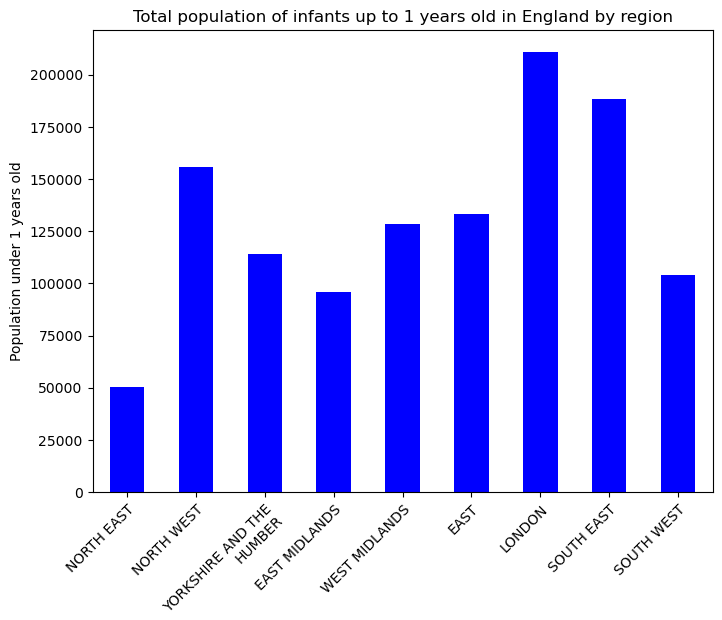

In [31]:
# Plot the population of infants per region in as graph 

# Configure plot, figsize, title, and axis labels
#under1_population_by_region_df.plot(kind="bar", x="Area", facecolor="blue", figsize=(10,6),
                                ###title="Total population of infants up to 1 years old in Englnd by region",
                                ###xlabel="Region",
                                #ylabel="Population under 1 years old",
                                #fontsize= "large")

figure1 = under1_population_by_region_df.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="Total population of infants up to 1 years old in England by region",
                                xlabel="Region",
                                ylabel="Population under 1 years old",
                                legend=False)

xticklabels = under1_population_by_region_df["Area"]
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()

In [33]:
# Save an image of the chart and print it to the screen
plt.tight_layout()
plt.savefig("Resources/Populationdata.png")
plt.show()

<Figure size 640x480 with 0 Axes>